In [1]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.append("../../../dedalus_subroutines")
from isospectrum import isospectrum

In [2]:
snapname = '../Gyre_stomlin_snap/Gyre_stomlin_snap_s1.h5'
diagname = '../Gyre_stomlin_diag/Gyre_stomlin_diag_s1.h5'

with h5py.File(snapname, mode='r') as file:
    
    Q_data = np.squeeze(np.array(file['tasks']['Q']))
    print(Q_data.shape)
    PSI_data = np.squeeze(np.array(file['tasks']['PSI']))
    BETA_data = np.squeeze(np.array(file['tasks']['BETA']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    r = np.array(file['scales'][list(file['scales'])[2]])
    th = np.array(file['scales'][list(file['scales'])[4]])

(20, 512, 256)
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190.]


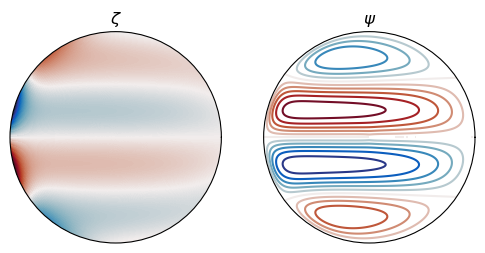

In [6]:
time_idx = -1

fig = plt.figure(figsize=(15/2.5, 7/2.5))

ax = fig.add_subplot(121, polar=True); ax.grid(False); plt.xticks([]); plt.yticks([]) 
pc = ax.pcolormesh(th.T,r.T,(Q_data[time_idx,:,:]-BETA_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
# fig.colorbar(pc); 
plt.title("$\zeta$")

ax = fig.add_subplot(122, polar=True); ax.grid(False); plt.xticks([]); plt.yticks([]) 
rads = np.arange(0, (2 * np.pi), 0.01)
pc = ax.contour(th.T,r.T,(PSI_data[time_idx,:,:]).T, 11, cmap=cmo.balance, norm=colors.CenteredNorm())
# fig.colorbar(pc); 
plt.title("$\psi$")

plt.savefig("figs/Gyre_stomlin_zetapsi.png", bbox_inches='tight', dpi=400)
plt.show()

(20,)


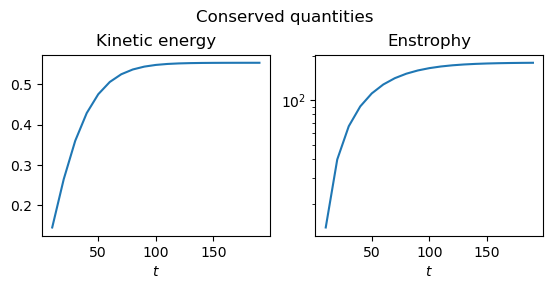

In [4]:
with h5py.File(diagname, mode='r') as file:
    
    KE_data = np.squeeze(np.array(file['tasks']['KE']))
    Ens_data = np.squeeze(np.array(file['tasks']['Enstrophy']))
    print(Ens_data.shape)
    
    diag_time_ary = np.array(file['scales']['sim_time'])
#     print(diag_time_ary)

fig=plt.figure(figsize=(11/1.7, 4/1.7))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Conserved quantities', y=1.07)
plt.subplot(1, 2, 1)
plt.plot(diag_time_ary[1:],KE_data[1:])
plt.xlabel('$t$')
plt.title('Kinetic energy')

# p.change_scales(1)
plt.subplot(1, 2, 2)
plt.semilogy(diag_time_ary[1:],Ens_data[1:])
plt.xlabel('$t$')
plt.title('Enstrophy')

plt.savefig('figs/Gyre_stomlin_energy.pdf', bbox_inches='tight')
plt.show()